In [11]:
import numpy as np
import h5py
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.serif'] = "Bitstream Vera Serif"
mpl.rcParams['font.family'] = "serif"
mpl.rcParams['font.size'] = 18

In [1]:
def get_cpsi(num_phi, wavlen, q1, q2):
        """
        Returns cos psi values
        ================================================================
        num_phi  - int, number of phi values in the ring
        
        wavlen   - float, wavelength in angstrom
        
        q1, q2   - float, magnitudes of q values
        
        Returns:
        cpsi     - 1d array, shape = (num_phi)
        """
        phis = np.arange( num_phi ) * 2 * np.pi / num_phi
        th1 = np.arcsin( q1 * wavlen / 4. / np.pi )
        th2 = np.arcsin( q2 * wavlen / 4. / np.pi )
        cpsi = np.cos(phis) * np.cos(th1)*np.cos(th2) + np.sin(th1)*np.sin(th2)
        
        return cpsi

In [8]:
f = h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/combined_tables/gai/run108.tbl','r')
print f.keys()
f['ebeam']['photon_energy'].value.mean(0)

[u'ebeam', u'event_time', u'evr', u'fiducials', u'gas_detector', u'phase_cav', u'polar_imgs', u'polar_mask', u'polar_mask_binned', u'polar_params', u'radial_profs']


9496.1567184952964

In [30]:
phi_offset = 10
waxs_rmin = 10 # pixel units
waxs_rmax = 1000
c = 2.998e8
h = 6.63e-34
ev_to_j = 1.602e-19
num_q = 50

pixsize = 110e-6 #meter
photon_energy = 9.496e3 #eV
wavlen = c * h/(photon_energy * ev_to_j) * 1e10 # angstrom
det_dist = 121e-3 # meter
d_dist = 7e-3
rs = np.arange(waxs_rmin, waxs_rmax)


thetas = np.arctan ( rs * pixsize / det_dist)  /2.   
dq = 4*np.pi/wavlen * np.cos(thetas) * np.sin(2*thetas)**2/(2.*rs*pixsize) *d_dist

qs =np.sin( thetas ) * 4.*np.pi/wavlen

print qs.min(), qs.max()
qs.shape
q_intervals = np.zeros( (num_q,2) )
interval = 7
# interval = int ( (waxs_rmax-waxs_rmin)/(num_q) )
for idx in range(num_q):
    try:
        q_intervals[idx] = np.array([qs[idx*interval],qs[(idx+1)*interval] ])
    except IndexError:
        q_intervals[idx] = np.array([qs[idx*interval],qs[-1] ])
        
qvalue = q_intervals[:,0]
print qvalue.shape




0.0437151310787 3.46585068153
(50,)


In [31]:
q_intervals[:,1]-q_intervals[:,0]

array([ 0.03059624,  0.03058947,  0.03057992,  0.0305676 ,  0.0305525 ,
        0.03053464,  0.03051403,  0.03049067,  0.03046459,  0.03043578,
        0.03040428,  0.03037009,  0.03033323,  0.03029372,  0.03025158,
        0.03020683,  0.0301595 ,  0.03010961,  0.03005718,  0.03000224,
        0.02994482,  0.02988494,  0.02982264,  0.02975794,  0.02969087,
        0.02962148,  0.02954979,  0.02947583,  0.02939965,  0.02932127,
        0.02924073,  0.02915808,  0.02907334,  0.02898656,  0.02889778,
        0.02880703,  0.02871436,  0.0286198 ,  0.0285234 ,  0.0284252 ,
        0.02832524,  0.02822356,  0.02812021,  0.02801522,  0.02790865,
        0.02780053,  0.02769091,  0.02757982,  0.02746732,  0.02735345])

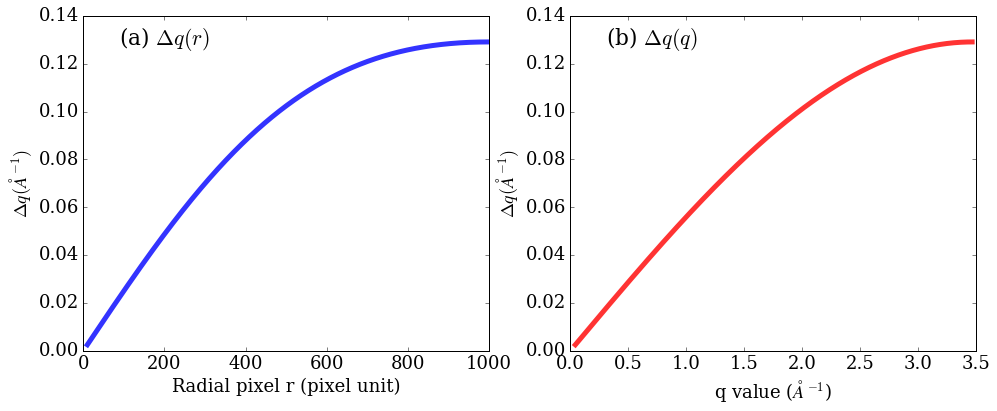

In [52]:
plt.figure(figsize=[16,6])
ax1 = plt.subplot(121)
plt.plot (rs,dq,'-', linewidth=5, alpha = 0.8,
         label='$\Delta q (r)$')
plt.xlabel('Radial pixel r (pixel unit)')
plt.ylabel('$\Delta q (\AA^{-1})$')
ax1.set_title('(a) $\Delta q (r)$', x = 0.2,y=0.9)
# ax2 = ax1.twiny()
ax1 = plt.subplot(122)
plt.plot (qs,dq,'r-', linewidth=5, alpha = 0.8)
plt.xlabel('q value ($\AA^{-1}$)')
plt.ylabel('$\Delta q (\AA^{-1})$')
ax1.set_title('(b) $\Delta q (q)$', x = 0.2,y=0.9)
plt.legend()
plt.savefig('dq_due_to_dist_z400.png', bbox_in_inches='tight')

In [20]:
num_phi = 326
cpsi = np.zeros( (qvalue.size, num_phi) )
for idx in range(qvalue.size):
    cpsi[idx] = get_cpsi(num_phi,wavlen,qvalue[idx],qvalue[idx])

NameError: name 'get_cpsi' is not defined

In [20]:
# np.save('encodeZ400_cpsi.npy',cpsi)
# np.save('encodeZ400_qvalue.npy',qvalue)